Total pendapatan per kategori per bulan:
       Category    Month  TotalSales
0     Clothing  2022-02        3800
1  Electronics  2022-01        2000
2  Electronics  2022-03        4500
3      Kitchen  2022-01        1500
4      Kitchen  2022-04        2250

Produk dengan harga tertinggi pada setiap kategori:
       Category ProductName  Price
3     Clothing   Product D    120
0  Electronics   Product A    200
5      Kitchen   Product F    300

Tren penjualan bulanan:
      Month  TotalSales
0  2022-01        3500
1  2022-02        3800
2  2022-03        4500
3  2022-04        2250


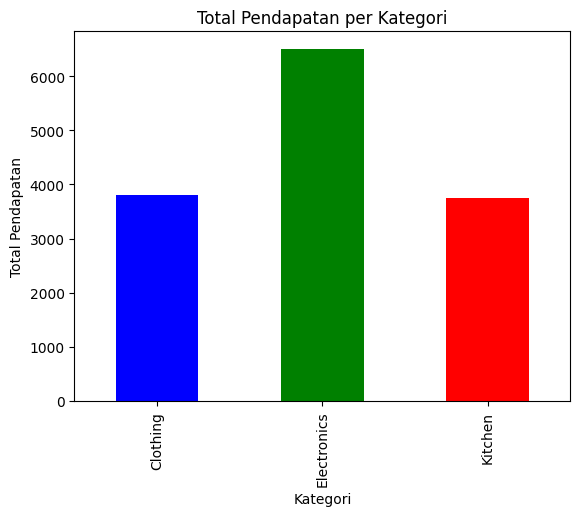

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame berdasarkan data yang diberikan
data = {
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006'],
    'ProductName': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F'],
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Kitchen', 'Kitchen'],
    'Quantity': [10, 30, 20, 15, 25, 5],
    'Price': [200, 150, 100, 120, 90, 300],
    'Date': pd.to_datetime(['2022-01-10', '2022-03-11', '2022-02-10', '2022-02-12', '2022-04-13', '2022-01-14'])
}

df = pd.DataFrame(data)

# Menambahkan kolom 'TotalSales' yang menghitung total penjualan (Quantity * Price)
df['TotalSales'] = df['Quantity'] * df['Price']

# 1. Menampilkan total pendapatan untuk setiap kategori produk per bulan
df['Month'] = df['Date'].dt.to_period('M')
total_sales_per_category_month = df.groupby(['Category', 'Month'])['TotalSales'].sum().reset_index()
print("Total pendapatan per kategori per bulan:\n", total_sales_per_category_month)

# 2. Menampilkan produk dengan harga tertinggi pada setiap kategori
highest_price_per_category = df.loc[df.groupby('Category')['Price'].idxmax()][['Category', 'ProductName', 'Price']]
print("\nProduk dengan harga tertinggi pada setiap kategori:\n", highest_price_per_category)

# 3. Analisis tren penjualan bulanan pada semua kategori
sales_trend_per_month = df.groupby('Month')['TotalSales'].sum().reset_index()
print("\nTren penjualan bulanan:\n", sales_trend_per_month)

# 4. Visualisasi total pendapatan pada setiap kategori
total_sales_per_category = df.groupby('Category')['TotalSales'].sum()
total_sales_per_category.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Total Pendapatan per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Total Pendapatan')
plt.show()
